## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning

## Learning Objectives

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

**SAVEE Dataset**

The SAVEE database was recorded from four native English male speakers (identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories: anger, disgust, fear, happiness, sadness and surprise. A neutral category is also added to provide recordings of 7 emotion categories.

The text material consisted of 15 TIMIT sentences per emotion: 3 common, 2 emotion-specific and 10 generic sentences that were different for each emotion and phonetically-balanced. The 3 common and 2 × 6 = 12 emotion-specific sentences were recorded as neutral to give 30 neutral sentences. This resulted in a total of 120 utterances per speaker

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://proceedings.scipy.org/articles/Majora-7b98e3ed-003).


### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1M4LO6727OIpa4_IXeWQKmUbN9nMpfDDJ/view?usp=drive_link) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.


## Grading = 10 Points

In [1]:
#@title Download the datasets and install packages
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip
!unzip -qq Ravdess_Tess.zip
# Install packages
!pip -qq install librosa soundfile
!pip -qq install wavio
print("Datasets downloaded successfully!")

Datasets downloaded successfully!


In [2]:
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/SaveeData.zip
!unzip -qq SaveeData.zip

In [3]:
!pip install optuna

### Import Neccesary Packages

In [4]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
import tqdm
import optuna
from lightgbm import Dataset, LGBMClassifier
from sklearn.metrics import f1_score,make_scorer
from sklearn.model_selection import StratifiedKFold

### Feature Extraction Functions
The feature extraction pipeline covers multiple aspects of audio analysis:

extract_prosodic_features(audio, sr): Extracts features related to prosody:

Pitch: Mean, standard deviation, max, min, and range of fundamental frequency.
Energy (Loudness): Statistical metrics (mean, std, max, min, range) of Root Mean Square (RMS) energy.
Speaking Rate: Measures the rate of pauses based on silence in the audio.
extract_voice_quality_features(audio, sr): Captures features related to voice quality:

Jitter: Variability in pitch (useful for capturing instability).
Shimmer: Variability in loudness.
Harmonic-to-Noise Ratio (HNR): Ratio of harmonic to percussive components.
extract_frequency_features(audio, sr): Analyzes frequency-domain features:

Spectral Centroid: Brightness of the sound.
Spectral Bandwidth: Range of frequencies.
Spectral Flatness: Tonality (flatness implies noise-like sound).
extract_time_frequency_features(audio, sr): Extracts features in the time-frequency domain:

Mel Spectrogram: Mean and std values of energy across Mel bands.
Chromagram: Captures harmonic content and pitch class distribution.
extract_cepstral_features(audio, sr): Extracts cepstral features:

MFCCs: Mean and std of 40 Mel Frequency Cepstral Coefficients (MFCCs).
Delta & Delta-Delta MFCCs: Captures dynamics in MFCCs over time.
extract_rhythm_features(audio, sr): Captures rhythm-related features:

Tempo: Estimated beats per minute.
Beat Strength: Overall strength of rhythmic beats.
### Audio Augmentation
The augmentation pipeline adds diversity to the training data by simulating real-world variations:

augment_audio(audio, sr, augmentations): Performs augmentations based on user-specified parameters:

Time Stretching: Adjusts the playback speed without changing pitch.
Pitch Shifting: Shifts the pitch up or down by semitones.
Adding Noise: Injects Gaussian noise to simulate noisy environments.
Speed Change: Alters playback speed while changing pitch.
Reverb: Applies artificial reverberation for echo-like effects.
random_augment_audio(audio, sr, seed=None): Randomly selects a combination of augmentations (e.g., pitch shift, noise) for a given audio file. Useful for creating diverse augmented datasets.

### Integrated Feature Extraction
extract_feature(file_path, augment=False):
Loads an audio file and optionally applies random augmentation.
Combines all extracted features (prosodic, voice quality, frequency, time-frequency, cepstral, and rhythm) into a unified dictionary.

In [5]:
import librosa
import numpy as np
from IPython.display import Audio

def extract_prosodic_features(audio, sr):
    features = {}
    
    # Pitch (Fundamental Frequency)
    pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
    pitches = pitches[pitches > 0]  # Ignore zeros
    features['pitch_mean'] = np.mean(pitches)
    features['pitch_std'] = np.std(pitches)
    features['pitch_max'] = np.max(pitches)
    features['pitch_min'] = np.min(pitches)
    features['pitch_range'] = np.max(pitches)- np.min(pitches)
    
    # Energy (Loudness)
    rms = librosa.feature.rms(y=audio)
    features['energy_mean'] = np.mean(rms)
    features['energy_std'] = np.std(rms)
    features['energy_max'] = np.max(rms)
    features['energy_min'] = np.min(rms)
    features['energy_range'] = np.max(rms)- np.min(rms)
    
    # Speaking Rate (using silence as a proxy for pauses)
    intervals = librosa.effects.split(audio, top_db=20)
    pause_durations = [(intervals[i][0] - intervals[i-1][1]) / sr for i in range(1, len(intervals))]
    features['speaking_rate'] = len(pause_durations) / librosa.get_duration(y=audio, sr=sr)
    
    return features


def extract_voice_quality_features(audio, sr):
    features = {}
    
    # Jitter
    pitches, _ = librosa.piptrack(y=audio, sr=sr)
    pitches = pitches[pitches > 0]
    features['jitter'] = np.std(np.diff(pitches))
    
    # Shimmer
    frame_energy = librosa.feature.rms(y=audio)
    features['shimmer'] = np.std(np.diff(frame_energy))
    
    # Harmonic-to-Noise Ratio (HNR)
    harmonic, percussive = librosa.effects.hpss(audio)
    features['hnr'] = np.sum(harmonic**2) / np.sum(percussive**2 + 1e-6)
    
    return features


def extract_frequency_features(audio, sr):
    features = {}
    
    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    features['spectral_centroid_mean'] = np.mean(spectral_centroid)
    features['spectral_centroid_std'] = np.std(spectral_centroid)
    
    # Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    features['spectral_bandwidth_mean'] = np.mean(spectral_bandwidth)
    features['spectral_bandwidth_std'] = np.std(spectral_bandwidth)
    
    # Spectral Flatness
    spectral_flatness = librosa.feature.spectral_flatness(y=audio)
    features['spectral_flatness_mean'] = np.mean(spectral_flatness)
    
    return features


def extract_time_frequency_features(audio, sr):
    features = {}
    
    # Mel-Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    
    values=np.mean(mel_spectrogram,axis=1)
    keys=['mel_spectrogram_mean{}'.format(i) for i in range(len(values))]
    
    mss_values=np.std(mel_spectrogram,axis=1)
    values=np.hstack([values,mss_values])
    keys+=['mel_spectrogram_std{}'.format(i) for i in range(len(mss_values))]
   
    
    # Chromagram
    chroma = librosa.feature.chroma_stft(S=np.abs(librosa.stft(audio)), sr=sr)

   
    cm_values=np.mean(chroma,axis=1)
    values=np.hstack([values,cm_values])
    keys+=['chroma_mean{}'.format(i) for i in range(len(cm_values))]

    
    cs_values=np.std(chroma,axis=1)
    values=np.hstack([values,cs_values])
    keys+=['chroma_std{}'.format(i) for i in range(len(cs_values))]

    
    features={k:v for k,v in zip(keys,values)}
    
    return features


def extract_cepstral_features(audio, sr):
    features = {}
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    for i in range(mfccs.shape[0]):
        features[f'mfcc_{i+1}_mean'] = np.mean(mfccs[i, :])
        features[f'mfcc_{i+1}_std'] = np.std(mfccs[i, :])
    
    # Delta and Delta-Delta MFCCs
    delta_mfccs = librosa.feature.delta(mfccs)
    delta_delta_mfccs = librosa.feature.delta(mfccs, order=2)
    for i in range(delta_mfccs.shape[0]):
        features[f'delta_mfcc_{i+1}_mean'] = np.mean(delta_mfccs[i, :])
        features[f'delta_delta_mfcc_{i+1}_mean'] = np.mean(delta_delta_mfccs[i, :])
    
    return features


def extract_rhythm_features(audio, sr):
    features = {}
    
    # Tempo
    tempo, _ = librosa.beat.beat_track(y=audio, sr=sr)
    features['tempo'] = tempo[0]
    
    # Beat Strength
    onset_env = librosa.onset.onset_strength(y=audio, sr=sr)
    features['beat_strength_mean'] = np.mean(onset_env)
    
    return features


import random

import librosa
import numpy as np
import random
from scipy.signal import convolve

def augment_audio(audio, sr, augmentations=None):
    """
    Perform augmentations on an audio signal for Speech Emotion Recognition (SER).

    Parameters:
    - audio (numpy.ndarray): Input audio signal.
    - sr (int): Sampling rate of the audio.
    - augmentations (dict): Dictionary specifying augmentations to apply. Keys can include:
        - "time_stretch": float, e.g., 0.9 to 1.1 (stretch factor).
        - "pitch_shift": int, e.g., -2 to 2 (semitones).
        - "add_noise": float, e.g., 0.01 to 0.05 (noise amplitude).
        - "speed_change": float, e.g., 0.9 to 1.1 (speed factor).
        - "reverb": bool, whether to apply reverb.

    Returns:
    - augmented_audio (numpy.ndarray): Augmented audio signal.
    """
    
    if augmentations is None:
        augmentations = {}

    augmented_audio = audio.copy()

    # Time Stretching
    if "time_stretch" in augmentations:
        stretch_factor = augmentations.get("time_stretch", 1.0)
        augmented_audio = librosa.effects.time_stretch(augmented_audio, rate=stretch_factor)

    # Pitch Shifting
    if "pitch_shift" in augmentations:
        pitch_shift_semitones = augmentations.get("pitch_shift", 0)
        augmented_audio = librosa.effects.pitch_shift(augmented_audio, sr=sr, n_steps=pitch_shift_semitones)

    # Adding Noise
    if "add_noise" in augmentations:
        noise_amplitude = augmentations.get("add_noise", 0.01)
        noise = np.random.normal(0, noise_amplitude, len(augmented_audio))
        augmented_audio = augmented_audio + noise

    # Speed Change
    if "speed_change" in augmentations:
        speed_factor = augmentations.get("speed_change", 1.0)
        augmented_audio = librosa.effects.time_stretch(augmented_audio, rate=speed_factor)

    # Adding Reverb
    if "reverb" in augmentations and augmentations["reverb"]:
        reverb_impulse = np.random.normal(0, 1, sr // 10)  # Impulse response for reverb
        reverb_impulse /= np.linalg.norm(reverb_impulse)  # Normalize impulse response
        augmented_audio = convolve(augmented_audio, reverb_impulse, mode="full")[:len(augmented_audio)]

    # Ensure audio length remains the same
    augmented_audio = librosa.util.fix_length(augmented_audio, size=len(audio))
   
   

    return augmented_audio


def random_augment_audio(audio, sr, seed=None):
    """
    Randomly applies a combination of audio augmentations for diversity.

    Parameters:
    - audio (numpy.ndarray): Input audio signal.
    - sr (int): Sampling rate of the audio.
    - seed (int, optional): Random seed for reproducibility.

    Returns:
    - augmented_audio (numpy.ndarray): Augmented audio signal.
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    augmentations = {}

    # Randomly decide to include each augmentation
    if random.choice([True, False]):  # Random chance for time stretching
        augmentations["time_stretch"] = random.uniform(0.95, 1.05)
    if random.choice([True, False]):  # Random chance for pitch shifting
        augmentations["pitch_shift"] = random.randint(-1, 1)
    if random.choice([True, False]):  # Random chance for adding noise
        augmentations["add_noise"] = random.uniform(0.005, 0.02)
    if random.choice([True, False]):  # Random chance for speed change
        augmentations["speed_change"] = random.uniform(0.95, 1.05)
    if random.choice([True, False]):  # Random chance for adding reverb
        augmentations["reverb"] = True

    return augment_audio(audio, sr, augmentations)


def extract_feature(file_path,augment=False):
    audio, sr = librosa.load(file_path, sr=None)

    if augment:
        audio=random_augment_audio(audio,sr)
    
    features = {}
    
    # Prosodic Features
    features.update(extract_prosodic_features(audio, sr))
    
    # Voice Quality Features
    features.update(extract_voice_quality_features(audio, sr))
    
    # Frequency-Domain Features
    features.update(extract_frequency_features(audio, sr))
    
    # Time-Frequency Features
    features.update(extract_time_frequency_features(audio, sr))
    
    # Cepstral Features
    features.update(extract_cepstral_features(audio, sr))
    
    # Rhythm Features
    features.update(extract_rhythm_features(audio, sr))
    
    return features


In [6]:
# YOUR CODE HERE
# y=
import re
savee_wav_files=glob.glob('/kaggle/working/SaveeData/*/*.wav')
savee_wav_files

emotions_ = []
mapping = {'a': 'angry', 'f': 'fear', 'd': 'disgust', 'h': 'happy', 'sa': 'sad', 'su': 'surprised', 'n': 'neutral'}
for file_name in savee_wav_files:
    emotions_.append(mapping[re.sub('[0-9]*', '', file_name.split("/")[-1].split(".")[0])])
input_list=[]

# for i in tqdm.tqdm(savee_wav_files):
#     input_list+=[extract_feature(i)]



In [7]:
savee_X=pd.DataFrame(savee_wav_files)
savee_X['target']=emotions_
savee_X

,0,target
0,/kaggle/working/SaveeData/KL/n28.wav,neutral
1,/kaggle/working/SaveeData/KL/su02.wav,surprised
2,/kaggle/working/SaveeData/KL/a10.wav,angry
3,/kaggle/working/SaveeData/KL/n27.wav,neutral
4,/kaggle/working/SaveeData/KL/h10.wav,happy
...,...,...
475,/kaggle/working/SaveeData/JK/su09.wav,surprised
476,/kaggle/working/SaveeData/JK/n26.wav,neutral
477,/kaggle/working/SaveeData/JK/n29.wav,neutral
478,/kaggle/working/SaveeData/JK/su11.wav,surprised


In [8]:
# YOUR CODE HERE
# y=
import re
tess_wav_files=glob.glob('/kaggle/working/Tess/*/*.wav')
tess_wav_files

emotions_ = []
for file_name in tess_wav_files:
    emotions_.append(file_name.split('_')[-1][:-4])
    
input_list=[]

# for i in tqdm.tqdm(tess_wav_files):
#     input_list+=[extract_feature(i)]

tess_X=pd.DataFrame(tess_wav_files)
tess_X['target']=emotions_
tess_X

,0,target
0,/kaggle/working/Tess/OAF_Sad/OAF_lore_sad.wav,sad
1,/kaggle/working/Tess/OAF_Sad/OAF_ripe_sad.wav,sad
2,/kaggle/working/Tess/OAF_Sad/OAF_knock_sad.wav,sad
3,/kaggle/working/Tess/OAF_Sad/OAF_hit_sad.wav,sad
4,/kaggle/working/Tess/OAF_Sad/OAF_mess_sad.wav,sad
...,...,...
2674,/kaggle/working/Tess/OAF_Fear/OAF_lean_fear.wav,fear
2675,/kaggle/working/Tess/OAF_Fear/OAF_bar_fear.wav,fear
2676,/kaggle/working/Tess/OAF_Fear/OAF_wife_fear.wav,fear
2677,/kaggle/working/Tess/OAF_Fear/OAF_dodge_fear.wav,fear


In [9]:
# YOUR CODE HERE
# y=
import re
revdess_wav_files=glob.glob('/kaggle/working/ravdess/*/*.wav')
revdess_wav_files

emotions_ = []
for file_name in revdess_wav_files:
    emotions_.append(file_name.split('_')[-1][:-4])
    
input_list=[]

# for i in tqdm.tqdm(revdess_wav_files):
#     input_list+=[extract_feature(i)]

revdess_X=pd.DataFrame(revdess_wav_files)
revdess_X['target']=emotions_
revdess_X

,0,target
0,/kaggle/working/ravdess/Actor_19/03-01-06-02-0...,fear
1,/kaggle/working/ravdess/Actor_19/03-01-03-02-0...,happy
2,/kaggle/working/ravdess/Actor_19/03-01-01-01-0...,neutral
3,/kaggle/working/ravdess/Actor_19/03-01-05-01-0...,angry
4,/kaggle/working/ravdess/Actor_19/03-01-08-02-0...,surprised
...,...,...
1163,/kaggle/working/ravdess/Actor_13/03-01-06-02-0...,fear
1164,/kaggle/working/ravdess/Actor_13/03-01-06-01-0...,fear
1165,/kaggle/working/ravdess/Actor_13/03-01-08-02-0...,surprised
1166,/kaggle/working/ravdess/Actor_13/03-01-03-01-0...,happy


In [10]:
train=pd.concat([revdess_X,tess_X,savee_X]).reset_index(drop=True)

In [11]:
train['target'].value_counts()

target
disgust      631
surprised    629
sad          622
fear         621
angry        621
happy        617
neutral      586
Name: count, dtype: int64

#### Split the data into train and test

In [12]:
X_train,X_test,y_train,y_test=train_test_split(train.iloc[:,:-1],train['target'],test_size=.2,random_state=42,stratify=train['target'])

### Extract Features and Augmenting on a proportion of data

In [13]:
# X_train_extracted=[]
# y_train_extracted=y_train.to_list()
# X_test_extracted=[]
# X_train_augmented=[]
# y_train_augmented=[]
# X_train_augmented_extracted=[]

# for i in tqdm.tqdm(X_train.values):
#     X_train_extracted+=[extract_feature(i[0])]

# for class_name in y_train.unique():
#     n=int(round(y_train[y_train==class_name].shape[0]/2,0))
#     random_rows = y_train[y_train==class_name].sample(n=n)
#     y_train_augmented+=[class_name]*n
#     X_train_augmented+=[X_train.loc[random_rows.index]]
# X_train_augmented=pd.concat(X_train_augmented)


# for i in tqdm.tqdm(X_train_augmented.values):
#     X_train_augmented_extracted+=[extract_feature(i[0],True)]

# for i in tqdm.tqdm(X_test.values):
#     X_test_extracted+=[extract_feature(i[0])]
    


In [14]:
# train_x=pd.concat([pd.DataFrame(X_train_extracted),pd.DataFrame(X_train_augmented_extracted)])
# train_y=pd.concat([pd.DataFrame(y_train_extracted),pd.DataFrame(y_train_augmented)])
# test_x=pd.DataFrame(X_test_extracted)
# test_y=pd.DataFrame(y_test.to_list())

### Save the test and train data for reusablity

In [15]:
# pd.concat([train_x,train_y],axis=1).to_csv('training_file.csv',index=False)
# pd.concat([test_x,test_y],axis=1).to_csv('testing_file.csv',index=False)

### Load the train and test data

In [16]:
train=pd.read_csv('/kaggle/input/preprocessed-ser-data/training_file (3).csv')
train_x,train_y=train.iloc[:,:-1],train['0']
test=pd.read_csv('/kaggle/input/preprocessed-ser-data/testing_file (3).csv')
test_x,test_y=test.iloc[:,:-1],test['0']

### Sacle the input data and Label Encode the Target Data

In [17]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
train_y=LE.fit_transform(train_y)
SS=StandardScaler()
train_x=SS.fit_transform(train_x)

### Finding the best Light Gradient Boosting Classifier Hyperparameters

In [18]:
# def objective(trial):
  
#   params={
#       'objective':'multiclass',
#       'num_leaves': trial.suggest_int('num_leaves', 2, 256),
#       'max_depth': trial.suggest_int('max_depth', 3, 256),
#       'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),
#       'n_estimators': trial.suggest_int('max_depth', -1, 256),
#       'class_weight': 'balanced',
#       'min_child_weight': trial.suggest_float('min_child_weight', 0.0005, 0.3),
#       'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#       'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
#       'reg_lambda':trial.suggest_float('reg_lambda', 0, 1),
#       'subsample_freq':trial.suggest_int('subsample_freq', 0, 4),
#       'subsample':trial.suggest_float('subsample', 0.7, 1),
#       'colsample_bytree':trial.suggest_float('subsample', 0.7, 1),
#       "num_boost_round": trial.suggest_int("num_boost_round", 1, 1000),  # Set valid range
#       "verbosity":-1
#   }
#   LGBC=LGBMClassifier(**params)
#   LGBC.fit(train_x,train_y,eval_set=[(SS.transform(test_x),LE.transform(test_y))])
#   return f1_score(LE.transform(test_y),LGBC.predict(SS.transform(test_x)),average='weighted')

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

In [19]:
# lgbm_params=study.best_trial.params
lgbm_params={'num_leaves': 235, 'max_depth': 67, 'learning_rate': 0.1745777512272209, 'min_child_weight': 0.2824522669714243, 'min_child_samples': 69, 'reg_alpha': 0.0030285018453082286, 'reg_lambda': 0.5022298917070829, 'subsample_freq': 4, 'subsample': 0.8187799591970512, 'num_boost_round': 739}

In [20]:
# from sklearn.metrics import classification_report
from catboost import CatBoostClassifier

### Finding the best Catboost Classifier Hyperparameters

In [21]:

# def objective(trial):
#     # Sample hyperparameters
#     params = {
#     'objective': 'MultiClass',  # Objective function
#     'eval_metric': 'TotalF1',  # Evaluation metric
#     'iterations': trial.suggest_int('iterations', 100, 1000),  # Number of boosting iterations
#     'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),  # Learning rate
#     'depth': trial.suggest_int('depth', 1, 16),  # Tree depth
#     'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10, log=True),  # L2 regularization
#     'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 10.0),  # For Bayesian bootstrap
#     'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),  # Minimum samples per leaf
#     'random_strength': trial.suggest_float('random_strength', 1e-9, 10, log=True),  # Random noise strength
#     'boosting_type': trial.suggest_categorical('boosting_type', ['Plain']),  # Boosting type
#     'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli']),  # Sampling type
#     'grow_policy': trial.suggest_categorical('grow_policy', [ 'Depthwise', 'Lossguide']),  
#     'logging_level': 'Silent',  # Disable logs
#     'use_best_model': True,  # Use the best model during evaluation
#     'random_seed': 42,  # For reproducibility
#     'task_type' :'GPU'
# }

#     # Handle `subsample` for Bernoulli bootstrap
#     if params['bootstrap_type'] == 'Bernoulli':
#         params['subsample'] = trial.suggest_float('subsample', 0.5, 1.0)
#     else:
#         params.pop('subsample', None)  # Remove `subsample` for incompatible bootstrap types

#     if params['bootstrap_type'] != 'Bayesian':
#         params.pop('bagging_temperature', None)  # Remove `subsample` for incompatible bootstrap types
    
#     if params['boosting_type'] == 'Ordered':
#         params['grow_policy'] = 'SymmetricTree'

#     # Train CatBoost model
#     CBC = CatBoostClassifier(**params)
#     CBC.fit(train_x,train_y,eval_set=[(SS.transform(test_x),LE.transform(test_y))], early_stopping_rounds=50, verbose=0)
#     return f1_score(LE.transform(test_y),CBC.predict(SS.transform(test_x)),average='weighted')

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

In [22]:
# CBC_params=study.best_trial.params
CBC_params={'iterations': 981, 'learning_rate': 0.27781365683472875, 'depth': 10, 'l2_leaf_reg': 0.11520490973496983, 'min_data_in_leaf': 65, 'random_strength': 3.120999957475126e-07, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'grow_policy': 'Lossguide', 'subsample': 0.9286237749708022}
CBC_params['task_type']='GPU'

### Creating OOF prediction for train data set over 5 folds for all the models


![](https://raw.githubusercontent.com/cleanlab/assets/master/cleanlab/pred_probs_cross_val.png)
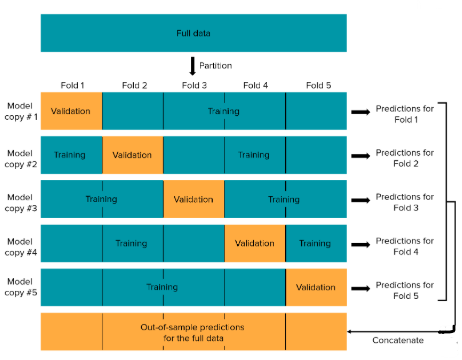
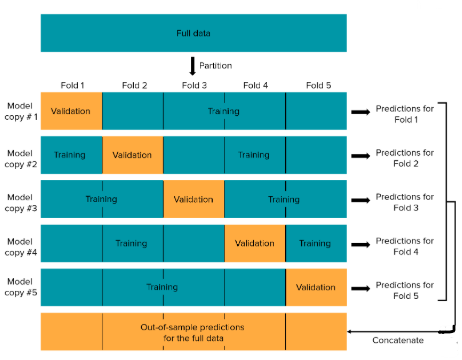
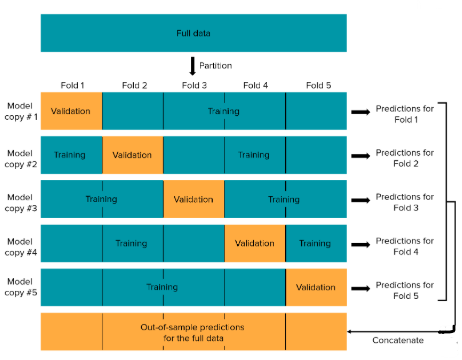

In [23]:
from catboost import CatBoostClassifier
f1_scorer = make_scorer(f1_score, average='weighted') 
# Define cross-validation strategy
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_list=['LGBMClassifier','CatBoostClassifier']
cols=[]
for i in model_list:
    cols+=['{}-{}'.format(i,j) for j in range(1,8)]
    
oof_predictions = pd.DataFrame(index=np.arange(len(train_y)), columns=cols)
lgbm_params['verbosity']=-1
params={
    'LGBMClassifier': lgbm_params,
    'CatBoostClassifier': CBC_params}
models = {
    'LGBMClassifier': LGBMClassifier(random_state=42,**params['LGBMClassifier']),
    'CatBoostClassifier': CatBoostClassifier(random_state=42,**params['CatBoostClassifier'],)}

# Compute OOF predictions
for model_name, model in models.items():
    # Generate OOF predictions
    print('Training {}'.format(model_name))
    oof_preds = np.zeros((len(train_y),7))
    for train_idx, val_idx in kf.split(train_x, train_y ):
        if model_name=='CatBoostClassifier':
            model.fit(train_x[train_idx], train_y[train_idx],early_stopping_rounds=50,verbose=0)
        else: 
            model.fit(train_x[train_idx], train_y[train_idx])
        
        oof_preds[val_idx] = model.predict_proba(train_x[val_idx])
    
    # Save OOF predictions
    oof_proba_model_features=['{}-{}'.format(model_name,j) for j in range(1,8)]
    oof_predictions[oof_proba_model_features] = oof_preds

# Save OOF predictions for stacking
oof_predictions.to_csv('oof_predictions.csv', index=False)
print("OOF predictions saved to 'oof_predictions.csv'")
oof_predictions['target']=train_y
oof_predictions['target']

Training LGBMClassifier
Training CatBoostClassifier
OOF predictions saved to 'oof_predictions.csv'


0       1
1       3
2       4
3       4
4       5
       ..
5184    6
5185    6
5186    6
5187    6
5188    6
Name: target, Length: 5189, dtype: int64

### Refitting the models on entire train data

In [24]:
for model_name, model in models.items():
    # Generate OOF predictions
    print('Training {}'.format(model_name))
    if model_name=='CatBoostClassifier':
        model.fit(train_x, train_y,early_stopping_rounds=50,verbose=0)
    else: 
        model.fit(train_x, train_y)
        

Training LGBMClassifier
Training CatBoostClassifier


### Finding the best hyperparameter for LightGB stacker (met model) on the OOF predictions of each model

In [25]:
# YOUR CODE HERE
X_train,X_test,y_train,y_test=train_test_split(oof_predictions.iloc[:,:-1],oof_predictions['target'],test_size=.2,random_state=42,stratify=oof_predictions['target'])

# def objective(trial):
  
#   params={
#       'objective':'multiclass',
#       'num_leaves': trial.suggest_int('num_leaves', 2, 256),
#       'max_depth': trial.suggest_int('max_depth', 2, 256),
#       'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),
#       'n_estimators': trial.suggest_int('max_depth', 10, 256),
#       'class_weight': 'balanced',
#       'min_child_weight': trial.suggest_float('min_child_weight', 0.0005, 0.3),
#       'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#       'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
#       'reg_lambda':trial.suggest_float('reg_lambda', 0, 1),
#       'subsample_freq':trial.suggest_int('subsample_freq', 0, 4),
#       'subsample':trial.suggest_float('subsample', 0.7, 1),
#       'colsample_bytree':trial.suggest_float('subsample', 0.7, 1),
#       "num_boost_round": trial.suggest_int("num_boost_round", 1, 1000),  # Set valid range
#       "verbosity":-1
#   }
#   LGBC=LGBMClassifier(**params)
#   LGBC.fit(X_train,y_train,eval_set=[(X_test,y_test)])
#   return f1_score(y_test,LGBC.predict(X_test),average='weighted')

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=200)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

### Training the best Meta Model

#### Early Stopping introduced in the meta model to avoid overfitting

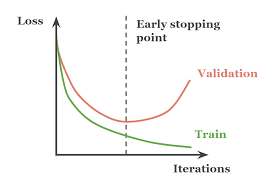

In [26]:
from lightgbm import early_stopping
meta_model_params={'num_leaves': 51, 'max_depth': 82, 'learning_rate': 0.03256777965656722, 'min_child_weight': 0.1055076547368873, 'min_child_samples': 38, 'reg_alpha': 0.36961400810437234, 'reg_lambda': 0.5944031233609163, 'subsample_freq': 4, 'subsample': 0.9581646384408284, 'num_boost_round': 21}
callback=early_stopping(stopping_rounds=50, first_metric_only=False, min_delta=[0.05])

In [27]:
def custom_f1_metric(y_true, y_pred):
    y_pred_labels = np.argmax(y_pred, axis=1)
    f1 = f1_score(y_true, y_pred_labels, average='weighted')
    return 'f1_weighted', f1, True
meta_model=LGBMClassifier(**meta_model_params)
meta_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],callbacks=[callback],eval_metric=custom_f1_metric)

Training until validation scores don't improve for 50 rounds
Using 0.05 as min_delta for all metrics.
Did not meet early stopping. Best iteration is:
[19]	valid_0's multi_logloss: 0.826095	valid_0's f1_weighted: 0.845695


LGBMClassifier(learning_rate=0.03256777965656722, max_depth=82,
               min_child_samples=38, min_child_weight=0.1055076547368873,
               num_boost_round=21, num_leaves=51, reg_alpha=0.36961400810437234,
               reg_lambda=0.5944031233609163, subsample=0.9581646384408284,
               subsample_freq=4)

### Predicting the Accuracy on Test Set

In [28]:
final_predictions_per_model = pd.DataFrame(index=np.arange(len(test_y)), columns=cols)
for model_name, model in models.items():
    # Generate OOF predictions
    print('Predicting for {}'.format(model_name))
    proba_model_features=['{}-{}'.format(model_name,j) for j in range(1,8)]
    final_predictions_per_model[proba_model_features] =  model.predict_proba(SS.transform(test_x))
final_predictions_per_model['target']=LE.transform(test_y)
meta_model.score(final_predictions_per_model.iloc[:,:-1],final_predictions_per_model['target'])

Predicting for LGBMClassifier
Predicting for CatBoostClassifier


0.8960739030023095

### Final Prediction and Submission

In [29]:
# choose the best working model and assign below
test_wav_files=glob.glob('/kaggle/input/audio-emotion-classificationb9/Kaggle_Testset/Kaggle_Testset/*.wav')
test_wav_files

emotions_ = []
for file_name in test_wav_files:
    emotions_.append(file_name.split('.wav')[-2].split('/')[-1])
    
input_list=[]

for i in tqdm.tqdm(test_wav_files):
    input_list+=[extract_feature(i)]

tess_X=pd.DataFrame(input_list)
tess_X['target']=emotions_
tess_X

100%|██████████| 201/201 [01:32<00:00,  2.17it/s]


,pitch_mean,pitch_std,pitch_max,pitch_min,pitch_range,energy_mean,energy_std,energy_max,energy_min,energy_range,...,delta_delta_mfcc_37_mean,delta_mfcc_38_mean,delta_delta_mfcc_38_mean,delta_mfcc_39_mean,delta_delta_mfcc_39_mean,delta_mfcc_40_mean,delta_delta_mfcc_40_mean,tempo,beat_strength_mean,target
0,1873.831665,1123.918457,3995.484863,154.985275,3840.499512,0.003014,0.004535,0.021641,0.000000e+00,0.021641,...,0.000083,-0.001308,0.000810,-0.002698,0.001352,-0.003655,0.001570,89.285714,1.322345,116
1,1819.772705,1340.301636,3992.672363,149.978577,3842.693848,0.036683,0.022262,0.082775,6.524798e-04,0.082122,...,-0.010941,-0.077588,-0.031503,0.015079,0.037818,0.072253,0.012335,81.743304,1.893842,66
2,1345.499512,1139.645874,3970.863525,156.734085,3814.129395,0.022711,0.017282,0.062520,8.070404e-04,0.061713,...,-0.067553,0.030837,-0.009668,-0.029916,-0.155917,0.000740,-0.129842,56.098346,2.318348,162
3,1841.795288,1154.939453,3995.754150,152.841003,3842.913086,0.010273,0.012454,0.040260,6.743496e-07,0.040259,...,0.000012,-0.000024,0.000010,-0.000020,0.000008,-0.000015,0.000007,93.750000,1.655067,17
4,1354.542969,1354.789185,3990.015625,158.130508,3831.885010,0.013708,0.008965,0.030089,6.342776e-04,0.029455,...,0.007946,-0.052319,0.035562,0.053386,0.018378,0.005282,0.039465,77.324747,1.582565,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1842.653931,1090.894165,3994.990479,152.397186,3842.593262,0.006562,0.008696,0.038480,8.583069e-06,0.038472,...,0.009713,0.006973,-0.014720,-0.028061,-0.003161,-0.065628,0.019925,156.250000,2.085721,2
197,1767.739380,1105.866333,3993.980957,152.489349,3841.491699,0.016706,0.023369,0.081093,5.309834e-06,0.081088,...,-0.006291,0.000554,0.002318,-0.001381,-0.002022,0.010020,-0.007741,170.454545,1.917717,35
198,1433.222778,1113.292725,3992.198486,152.351089,3839.847412,0.009506,0.013922,0.052000,2.970202e-05,0.051970,...,-0.013453,-0.008837,-0.012877,-0.014162,-0.003194,-0.003727,-0.011101,75.000000,1.407638,134
199,1480.570801,1149.008911,3997.610352,150.852219,3846.758057,0.015749,0.010568,0.040906,1.208256e-03,0.039698,...,-0.014654,-0.020325,0.044292,-0.028406,0.024036,-0.024399,0.032452,110.039062,2.082729,189


In [30]:
final_predictions_per_model = pd.DataFrame(index=np.arange(len(tess_X)), columns=cols)
for model_name, model in models.items():
    # Generate OOF predictions
    print('Predicting for {}'.format(model_name))
    proba_model_features=['{}-{}'.format(model_name,j) for j in range(1,8)]
    final_predictions_per_model[proba_model_features] =  model.predict_proba(SS.transform(tess_X.iloc[:,:-1]))
pred=meta_model.predict(final_predictions_per_model)

Predicting for LGBMClassifier
Predicting for CatBoostClassifier


In [31]:
sub=pd.read_csv('/kaggle/input/audio-emotion-classificationb9/Sample_Submission.csv')

In [32]:
sub['Label']=LE.inverse_transform(pred)
sub['Id']=emotions_
sub.to_csv('sub_feature_eng_aug_stack_lgbm_cbc.csv',index=False)